In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/KIIT/Downloads/Soyabean stock.csv')

In [4]:
df = df[:2000]

In [5]:
df

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,06-11-2019,922.25,922.50,914.25,915.00,6.75,915.00,1583,1273
1,05-11-2019,925.25,928.75,920.00,922.00,4.00,921.75,660,1595
2,04-11-2019,923.25,929.75,921.00,925.50,1.50,925.75,1285,2268
3,01-11-2019,915.50,926.50,915.00,924.50,7.50,924.25,7087,6290
4,31-10-2019,915.75,920.50,910.50,916.50,0.75,916.75,14026,10218
5,30-10-2019,917.75,921.50,915.25,916.00,2.25,916.00,104394,47495
6,29-10-2019,921.00,925.25,916.00,918.00,2.50,918.25,135940,81703
7,28-10-2019,921.50,926.00,920.25,920.00,0.50,920.75,120666,111275
8,25-10-2019,933.50,937.25,919.50,920.75,13.00,920.25,146594,156819
9,24-10-2019,933.75,939.00,932.75,932.25,0.50,933.25,108576,180368


In [6]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
df = df.reindex(index=df.index[::-1])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 1999 to 0
Data columns (total 9 columns):
Date                          2000 non-null datetime64[ns]
Open                          1996 non-null float64
High                          1999 non-null float64
Low                           1998 non-null float64
Last                          1999 non-null float64
Change                        1422 non-null float64
Settle                        2000 non-null float64
Volume                        2000 non-null int64
Previous Day Open Interest    2000 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 140.8 KB


In [9]:
df

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
1999,2011-01-12,1139.50,1139.50,1116.50,1128.00,NaN,1128.00,110277,207448
1998,2011-02-12,1132.50,1144.50,1128.50,1135.75,NaN,1135.75,86445,206030
1997,2011-05-12,1143.00,1146.50,1122.50,1126.25,NaN,1126.25,88752,201222
1996,2011-06-12,1120.00,1131.50,1120.00,1129.50,NaN,1129.50,82019,198236
1995,2011-07-12,1134.00,1134.00,1125.50,1131.00,NaN,1131.00,90123,191655
1994,2011-08-12,1122.50,1136.50,1121.00,1132.50,NaN,1132.50,116202,186162
1993,2011-09-12,1120.00,1120.00,1100.50,1107.00,NaN,1107.00,156508,181819
1992,2011-12-12,1096.00,1113.50,1096.00,1112.00,NaN,1112.00,106957,167392
1991,2011-12-13,1118.00,1127.00,1110.50,1118.50,NaN,1118.50,105958,156117
1990,2011-12-14,1109.00,1111.00,1095.00,1100.00,NaN,1100.00,130680,143114


In [10]:
df.set_index('Date',inplace=True)

In [11]:
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2011-01-12,1139.5,1139.5,1116.5,1128.00,NaN,1128.00,110277,207448
2011-02-12,1132.5,1144.5,1128.5,1135.75,NaN,1135.75,86445,206030
2011-05-12,1143.0,1146.5,1122.5,1126.25,NaN,1126.25,88752,201222
2011-06-12,1120.0,1131.5,1120.0,1129.50,NaN,1129.50,82019,198236
2011-07-12,1134.0,1134.0,1125.5,1131.00,NaN,1131.00,90123,191655


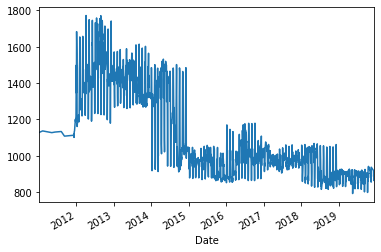

In [12]:
df['Settle'].plot()

In [13]:
timeseries = df['Settle']

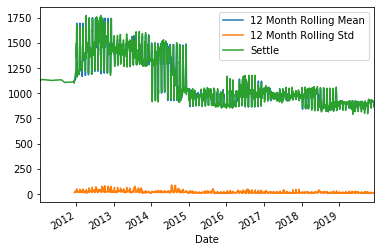

In [14]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

In [15]:
timeseries.rolling(12).mean()

Date
2011-01-12           NaN
2011-02-12           NaN
2011-05-12           NaN
2011-06-12           NaN
2011-07-12           NaN
                 ...    
2019-10-31    926.645833
2019-01-11    926.333333
2019-04-11    925.854167
2019-05-11    924.833333
2019-06-11    923.312500
Name: Settle, Length: 2000, dtype: float64

<Figure size 432x288 with 0 Axes>

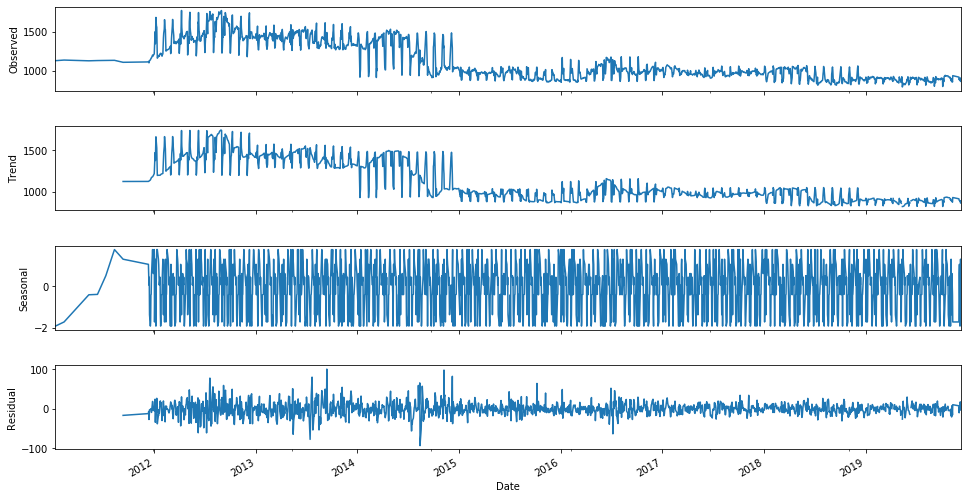

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Settle'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Settle'])
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.4940578180573176
p-value : 0.5364487765807615
#Lags Used : 9
Number of Observations Used : 1990
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

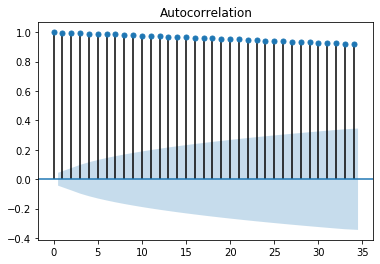

In [19]:
fig_first = plot_acf(df["Settle"].dropna())

In [20]:
df['Settle 1'] = df['Settle'] - df['Settle'].shift(1)

In [21]:
result = adfuller(df['Settle 1'].dropna())
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -13.111476606360773
p-value : 1.6314617098891597e-24
#Lags Used : 8
Number of Observations Used : 1990
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


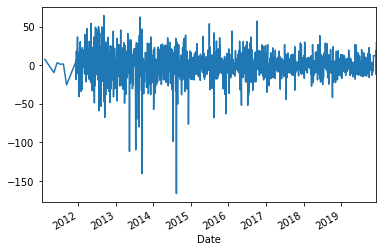

In [22]:
df['Settle 1'].plot()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

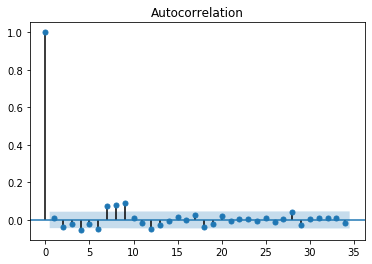

In [24]:
fig_first = plot_acf(df["Settle 1"].dropna())

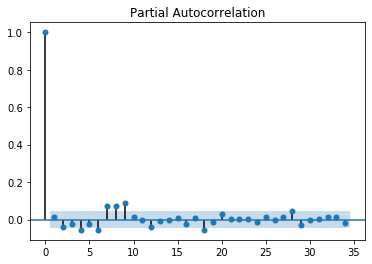

In [25]:
fig_first = plot_pacf(df["Settle 1"].dropna())

In [28]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['Settle'], order=(2,1,1))
result = model.fit(disp = 0)
print(result.summary())

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Settle   No. Observations:                 1999
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -8409.640
Method:                       css-mle   S.D. of innovations             16.248
Date:                Mon, 06 Jan 2020   AIC                          16829.279
Time:                        21:58:11   BIC                          16857.281
Sample:                             1   HQIC                         16839.561
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1061      0.329     -0.322      0.747      -0.751       0.539
ar.L1.D.Settle     0.5913      0.136      4.353      0.000       0.325       0.858
ar.L2.D.Settle    -0.0544      0.023

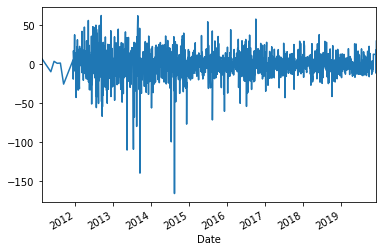

In [29]:
result.resid.plot()

In [30]:
result.resid

Date
2011-02-12    7.856101
2011-05-12   -9.489398
2011-06-12    3.848184
2011-07-12    1.341639
2011-08-12    1.617701
                ...   
2019-10-31    0.571550
2019-01-11    7.314963
2019-04-11    1.401796
2019-05-11   -3.615681
2019-06-11   -6.353009
Length: 1999, dtype: float64

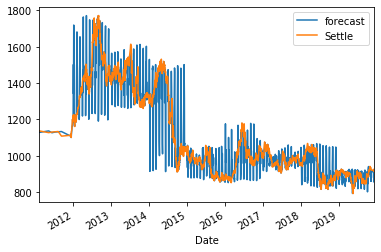

In [31]:
result.plot_predict(dynamic=False)
plt.show()

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


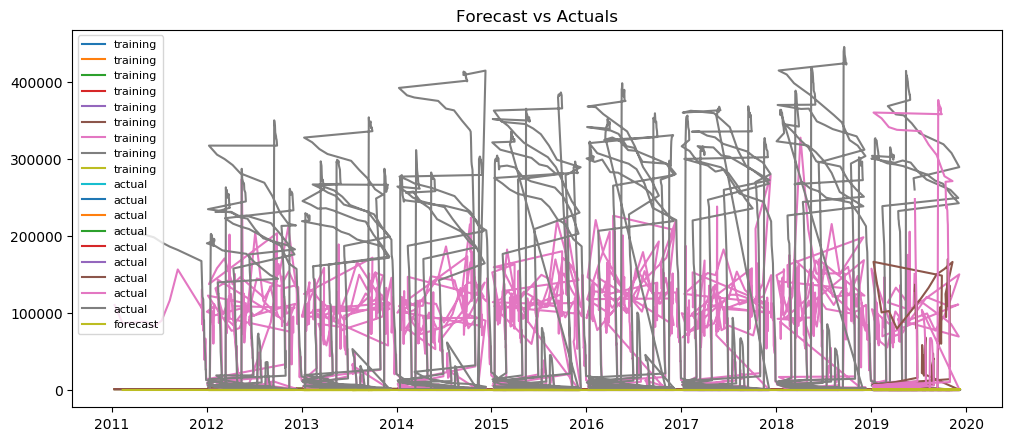

In [43]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.iloc[:1900]
test = df.iloc[1900:]

# Build Model 
model = ARIMA(train['Settle'], order=(2,1,1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(100, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [44]:
fitted.summary()# 1 1 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 1899
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -8023.497
Method:                       css-mle   S.D. of innovations             16.547
Date:                Mon, 06 Jan 2020   AIC                          16056.994
Time:                        21:59:48   BIC                          16084.739
Sample:                             1   HQIC                         16067.208
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1152      0.345     -0.334      0.738      -0.791       0.560
ar.L1.D.Settle     0.5896      0.139      4.237      0.000       0.317       0.862
ar.L2.D.Settle    -0.0563      0.023     -2.427      0.015      -0.102      -0.011
ma.L1.D.Settle    -0.5765      0.138     -4.182      0.000      -0.847      -0.306
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1290           +0.0000j            2.1290            0.0000
AR.2            8.3401           +0.0000j            8.3401            0.0000
MA.1            1.7347           +0.0000j            1.7347            0.0000
-----------------------------------------------------------------------------
"""

In [45]:
rmse = np.mean((fc - test['Settle'])**2)**.5 

In [46]:
rmse

32.13455744974925

In [47]:
mpe = np.mean((fc - test['Settle'])/test['Settle'])
mpe

0.016413503679670892

In [48]:
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Settle 1
Date,,,,,,,,,
2019-10-31,915.75,920.50,910.50,916.5,0.75,916.75,14026,10218,0.75
2019-01-11,915.50,926.50,915.00,924.5,7.50,924.25,7087,6290,7.50
2019-04-11,923.25,929.75,921.00,925.5,1.50,925.75,1285,2268,1.50
2019-05-11,925.25,928.75,920.00,922.0,4.00,921.75,660,1595,-4.00
2019-06-11,922.25,922.50,914.25,915.0,6.75,915.00,1583,1273,-6.75


In [49]:
from pandas.tseries.offsets import DateOffset

In [50]:
future_dates = [df.index[-1] + DateOffset(days=x) for x in range(0,1080) ]

In [51]:
future_dates

[Timestamp('2019-06-11 00:00:00'),
 Timestamp('2019-06-12 00:00:00'),
 Timestamp('2019-06-13 00:00:00'),
 Timestamp('2019-06-14 00:00:00'),
 Timestamp('2019-06-15 00:00:00'),
 Timestamp('2019-06-16 00:00:00'),
 Timestamp('2019-06-17 00:00:00'),
 Timestamp('2019-06-18 00:00:00'),
 Timestamp('2019-06-19 00:00:00'),
 Timestamp('2019-06-20 00:00:00'),
 Timestamp('2019-06-21 00:00:00'),
 Timestamp('2019-06-22 00:00:00'),
 Timestamp('2019-06-23 00:00:00'),
 Timestamp('2019-06-24 00:00:00'),
 Timestamp('2019-06-25 00:00:00'),
 Timestamp('2019-06-26 00:00:00'),
 Timestamp('2019-06-27 00:00:00'),
 Timestamp('2019-06-28 00:00:00'),
 Timestamp('2019-06-29 00:00:00'),
 Timestamp('2019-06-30 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-07-02 00:00:00'),
 Timestamp('2019-07-03 00:00:00'),
 Timestamp('2019-07-04 00:00:00'),
 Timestamp('2019-07-05 00:00:00'),
 Timestamp('2019-07-06 00:00:00'),
 Timestamp('2019-07-07 00:00:00'),
 Timestamp('2019-07-08 00:00:00'),
 Timestamp('2019-07-

In [52]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df = pd.concat([df,future_dates_df])
df = future_df
df

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Settle 1
2011-01-12,1139.5,1139.50,1116.50,1128.00,NaN,1128.00,110277,207448,NaN
2011-02-12,1132.5,1144.50,1128.50,1135.75,NaN,1135.75,86445,206030,7.75
2011-05-12,1143.0,1146.50,1122.50,1126.25,NaN,1126.25,88752,201222,-9.50
2011-06-12,1120.0,1131.50,1120.00,1129.50,NaN,1129.50,82019,198236,3.25
2011-07-12,1134.0,1134.00,1125.50,1131.00,NaN,1131.00,90123,191655,1.50
2011-08-12,1122.5,1136.50,1121.00,1132.50,NaN,1132.50,116202,186162,1.50
2011-09-12,1120.0,1120.00,1100.50,1107.00,NaN,1107.00,156508,181819,-25.50
2011-12-12,1096.0,1113.50,1096.00,1112.00,NaN,1112.00,106957,167392,5.00
2011-12-13,1118.0,1127.00,1110.50,1118.50,NaN,1118.50,105958,156117,6.50
2011-12-14,1109.0,1111.00,1095.00,1100.00,NaN,1100.00,130680,143114,-18.50


c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


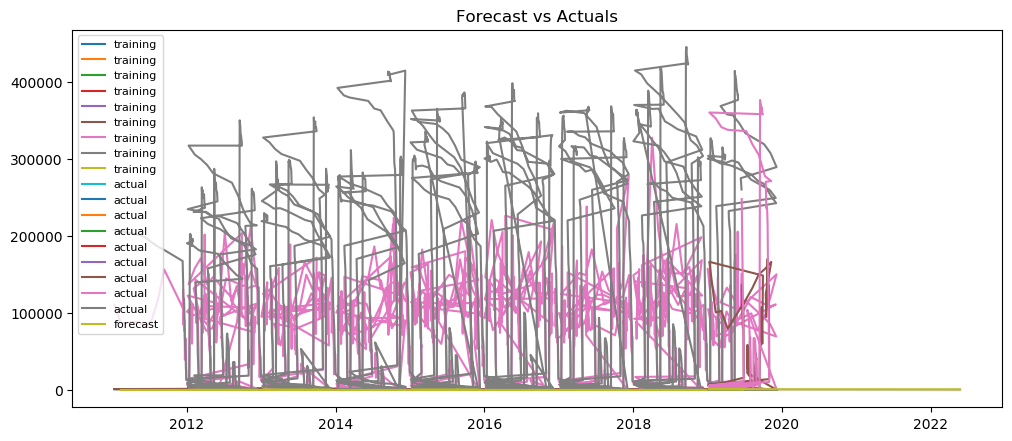

In [53]:
# Create Training and Test
train = df.iloc[:1900]
test = df.iloc[1900:]

# Build Model 
model = ARIMA(train['Settle'], order=(2,1,1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(1179, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [55]:
fc_series #Soyabean forecast

2019-06-18    911.852579
2019-06-19    910.368597
2019-06-20    909.490423
2019-06-21    909.002476
2019-06-24    908.710492
                 ...    
2022-05-21    773.827063
2022-05-22    773.711913
2022-05-23    773.596762
2022-05-24    773.481611
2022-05-25    773.366460
Length: 1179, dtype: float64

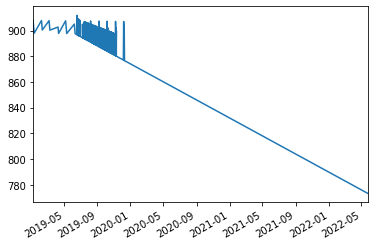

In [56]:
fc_series.plot()  #Soyabean forecast